# Kalman Filter
UAV flies through the strong wind and begins to oscillate. The pitch angle change was measured
with the gyro during a few seconds. Estimate proper trajectory for the pitch angle while considering
the gyro reading are normally distributed by using Kalman filter. 

In this problem we only got measurements from the gyro no model.
only update step will be applied no prediction

In [2]:
#needed libraries
import matplotlib.pyplot as plt
import numpy as np
import math

### Read data 

In [3]:
file = open('case1.txt')
#put them into two lists
x = []
y = []
for i in file:
    point = i.rstrip().split(',')
    x.append(float(point[0]))
    y.append(float(point[1]))

### visaualize data
this step is done for getting an intiuation on how the data looks like but it is not necessery

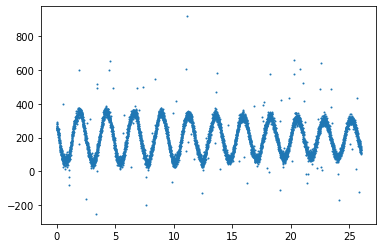

In [4]:
#plot the data
plt.scatter(x,y, s=1)
plt.show()

### Update step
this function takes the mean and standrad deviation of:<br />
the prior measurement (prediction if we have one) and the current measurement <br/>
calculate the new mean , new standard deviation

In [5]:
'''we only have measurement no prediction'''
#TODO update function, add photo for the equation in the report
def update (mean1, mean2, var1, var2):
    new_mean = (var2*mean1 + var1*mean2) / (var1+var2)
    new_var = (var1*var2)/(var1+var2)
    return new_mean, new_var

##### assumptions
standard deviation of the prior or intial condition = 5 
this assumption will not affect our results so much as the value will converge to more trust values 
standard deviation of the measurement = 5 

In [6]:
'''
i will assume the variance of the measurement is constant equal to 5
TODO try different values for the variance 
'''
mesure_var = 5 #variance
prior_var = 5 #prior var
prior_mean = y[0]
kal = [y[0]]
for i in range(1,len(y)):
    prior_mean, prior_var = update(prior_mean, y[i], prior_var, mesure_var)
    kal.append(prior_mean)

### visualization 
the change of the mean across the time

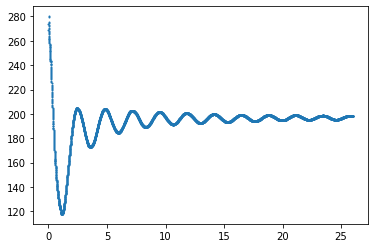

In [7]:
plt.scatter(x,kal,s=1)

### Results

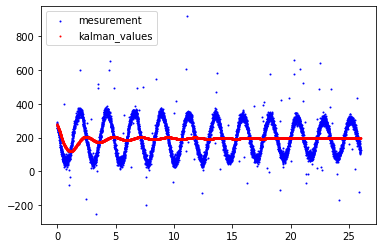

In [8]:
#plot the measurements and the estimations

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=1, c='b', label='mesurement')
ax1.scatter(x, kal, s=1, c='r', label='kalman_values')
plt.legend(loc='upper left');
plt.show()

### References
https://www.youtube.com/watch?v=jn8vQSEGmuM
https://towardsdatascience.com/kalman-filters-a-step-by-step-implementation-guide-in-python-91e7e123b968
https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48